<a href="https://colab.research.google.com/github/nadunchanna98/MultiOmics-CervicalCancer-MachineLearning-DataProcessing/blob/main/Use_Different_algorithms_methylation450K_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [151]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [152]:
import os
df1 = pd.read_csv('/content/drive/MyDrive/RESEACH/TCGA Cervical Cancer (CESC)/methilation450K-Preprocessed-data/features_200_samples_96_methilation450K.csv')

In [153]:
df1.drop("Unnamed: 0",axis=1,inplace=True)

In [154]:
df1.drop("id",axis=1,inplace=True)
label_encoder = LabelEncoder()
df1['histological_type'] = label_encoder.fit_transform(df1['histological_type'])
df1

,histological_type,cg26961332,cg01847620,cg01814098,cg17812026,cg25800170,cg13682477,cg23889391,cg26082557,cg14239811,...,cg08643007,cg08367083,cg00810836,cg04087237,cg25379026,cg08839858,cg15794252,cg09806118,cg04020999,cg06960784
0,0,0.9837,0.9861,0.5218,0.9785,0.4325,0.5275,0.5703,0.1668,0.0094,...,0.0314,0.0242,0.0178,0.2605,0.4319,0.5527,0.0146,0.5959,0.9861,0.2167
1,0,0.9910,0.9884,0.0202,0.9882,0.0180,0.0199,0.0155,0.0183,0.0113,...,0.0641,0.0278,0.0279,0.0175,0.0161,0.0276,0.0143,0.0380,0.9829,0.0225
2,0,0.8326,0.7987,0.0328,0.6349,0.0162,0.0252,0.0152,0.0156,0.0138,...,0.0226,0.0208,0.0284,0.0183,0.1321,0.0224,0.0137,0.0146,0.9734,0.0261
3,0,0.9626,0.9824,0.1640,0.8771,0.0163,0.0237,0.0193,0.2199,0.0122,...,0.0370,0.0215,0.0293,0.0143,0.0180,0.0209,0.0144,0.0133,0.9803,0.0222
4,0,0.9898,0.9820,0.2013,0.9901,0.0226,0.0580,0.0146,0.0131,0.0744,...,0.0188,0.0670,0.0729,0.0246,0.0766,0.2659,0.0133,0.0117,0.9856,0.0663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,1,0.9891,0.9866,0.0169,0.9869,0.0192,0.0188,0.0158,0.0158,0.0109,...,0.0338,0.0200,0.0439,0.0123,0.0184,0.0158,0.0140,0.0142,0.9808,0.0186
92,1,0.9919,0.9876,0.0181,0.9873,0.0137,0.0140,0.0117,0.0119,0.0094,...,0.0228,0.0198,0.0203,0.0132,0.0137,0.0158,0.0109,0.0132,0.9842,0.0162
93,1,0.9875,0.9850,0.0209,0.9871,0.0182,0.0205,0.0143,0.0178,0.0110,...,0.0241,0.0215,0.0198,0.0116,0.0167,0.0252,0.0141,0.0175,0.9792,0.0204
94,1,0.9916,0.9884,0.0192,0.4436,0.0136,0.0167,0.0134,0.0129,0.2724,...,0.0262,0.0208,0.0297,0.4727,0.0142,0.0172,0.4836,0.0111,0.9810,0.3358


###50 Features 96 samples

In [155]:
X = df1.iloc[:, 1:51]  # Select columns from index 2 to 21 (exclusive)
y = df1['histological_type']

In [156]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [157]:
# Create classifiers
svm_classifier = SVC(kernel='linear', C=1)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
tree_classifier = DecisionTreeClassifier(max_depth=5)
xgb_classifier = XGBClassifier()
rf_classifier = RandomForestClassifier()

In [158]:
classifiers = [
    ('SVM', svm_classifier),
    ('KNN', knn_classifier),
    ('Decision Tree', tree_classifier),
    ('XGBoost', xgb_classifier),
    ('Random Forest', rf_classifier)
]

In [159]:
metrics = {
    'SVM': {'accuracy': [], 'precision': [], 'recall': [], 'f1': []},
    'KNN': {'accuracy': [], 'precision': [], 'recall': [], 'f1': []},
    'Decision Tree': {'accuracy': [], 'precision': [], 'recall': [], 'f1': []},
    'XGBoost': {'accuracy': [], 'precision': [], 'recall': [], 'f1': []},
    'Random Forest': {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}  # Include Random Forest
}

In [160]:
for classifier_name, classifier in classifiers:
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Fit the model to the training data
        classifier.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = classifier.predict(X_test)

        # Evaluate the model's performance for this fold
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        metrics[classifier_name]['accuracy'].append(accuracy)
        metrics[classifier_name]['precision'].append(precision)
        metrics[classifier_name]['recall'].append(recall)
        metrics[classifier_name]['f1'].append(f1)

In [161]:
for classifier_name, _ in classifiers:
    mean_accuracy = np.mean(metrics[classifier_name]['accuracy'])
    mean_precision = np.mean(metrics[classifier_name]['precision'])
    mean_recall = np.mean(metrics[classifier_name]['recall'])
    mean_f1 = np.mean(metrics[classifier_name]['f1'])

    std_accuracy = np.std(metrics[classifier_name]['accuracy'])
    std_precision = np.std(metrics[classifier_name]['precision'])
    std_recall = np.std(metrics[classifier_name]['recall'])
    std_f1 = np.std(metrics[classifier_name]['f1'])

    # Print the mean and standard deviation of evaluation metrics for each classifier
    print(f'{classifier_name} Metrics:')
    print(f'Mean Accuracy: {mean_accuracy:.4f} (±{std_accuracy:.4f})')
    print(f'Mean Precision: {mean_precision:.4f} (±{std_precision:.4f})')
    print(f'Mean Recall: {mean_recall:.4f} (±{std_recall:.4f})')
    print(f'Mean F1-score: {mean_f1:.4f} (±{std_f1:.4f})')
    print()

SVM Metrics:
Mean Accuracy: 0.9144 (±0.0824)
Mean Precision: 0.8803 (±0.1357)
Mean Recall: 0.9667 (±0.1000)
Mean F1-score: 0.9104 (±0.0867)

KNN Metrics:
Mean Accuracy: 0.8244 (±0.1087)
Mean Precision: 0.7370 (±0.1748)
Mean Recall: 0.9667 (±0.1000)
Mean F1-score: 0.8229 (±0.1332)

Decision Tree Metrics:
Mean Accuracy: 0.8622 (±0.0868)
Mean Precision: 0.9308 (±0.1247)
Mean Recall: 0.8062 (±0.1374)
Mean F1-score: 0.8484 (±0.0766)

XGBoost Metrics:
Mean Accuracy: 0.9156 (±0.0425)
Mean Precision: 0.9250 (±0.1000)
Mean Recall: 0.8940 (±0.1389)
Mean F1-score: 0.8961 (±0.0694)

Random Forest Metrics:
Mean Accuracy: 0.9256 (±0.0490)
Mean Precision: 0.9250 (±0.1000)
Mean Recall: 0.9357 (±0.1086)
Mean F1-score: 0.9213 (±0.0648)



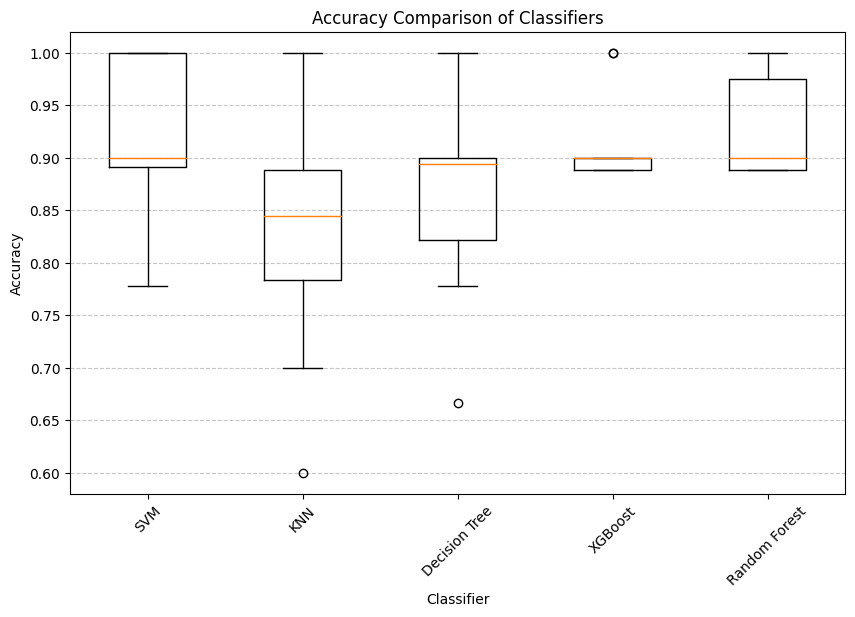

In [162]:
accuracies = [metrics[classifier_name]['accuracy'] for classifier_name, _ in classifiers]

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(accuracies, labels=[classifier_name for classifier_name, _ in classifiers])
plt.title("Accuracy Comparison of Classifiers")
plt.ylabel("Accuracy")
plt.xlabel("Classifier")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()